#**Install Spark**

In [1]:
#!pip3 -q install pyspark==3.0.3    # Problem with newer spark versions resolved, no need to install older version
!pip3 -q install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import BooleanType
from pyspark.sql.types import StringType
import re

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lower, regexp_replace

spark = SparkSession.builder \
    .appName("ReadCSVExample") \
    .getOrCreate()

#**Import Data**

In [6]:
# Flie bình luận
!gdown --id 15SHLILUdZ4a44oIvDTDVP35N1Kdjz8DH

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15SHLILUdZ4a44oIvDTDVP35N1Kdjz8DH
To: /content/BIGDATA_DATA_FACEBOOK.csv
100% 12.8M/12.8M [00:00<00:00, 103MB/s] 


In [4]:
# File bình luận
!pip install gdown
import gdown

file_url = "https://drive.google.com/uc?id=1j2GdUcs7aZx14qyQuRcfs2JXyXYWf8VJ"
output = "/content/200k_comments.csv"

# Tải file về
gdown.download(file_url, output, quiet=False)

# Đọc dữ liệu từ file CSV

csv_data = spark.read.csv(output, header=True, inferSchema=True)

csv_data.show(5, truncate=False)

Downloading...
From: https://drive.google.com/uc?id=1j2GdUcs7aZx14qyQuRcfs2JXyXYWf8VJ
To: /content/200k_comments.csv
100%|██████████| 38.2M/38.2M [00:00<00:00, 142MB/s]


+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|comments                                                                                                                                                                    |_c1                                                    |_c2 |_c3 |_c4 |_c5 |_c6 |_c7 |_c8 |_c9 |_c10|_c11|_c12|_c13

In [5]:
# Lấy danh sách các cột
columns = csv_data.columns

In [7]:
# Danh sách các cột trừ cột 'comments'
columns = [col for col in csv_data.columns if col != 'comments']

# Gộp các giá trị từ các cột còn lại vào cột 'comments'
from pyspark.sql.functions import concat_ws, col

csv_data = csv_data.withColumn('comments', concat_ws(' ', col('comments'), *[col(c) for c in columns]))

# Chỉ giữ lại cột 'comments'
csv_data = csv_data.select('comments')
# Hiển thị một vài dòng của DataFrame mới để kiểm tra
csv_data.show(5)

+--------------------+
|            comments|
+--------------------+
|Thương chị !!!!! ...|
|  Chuẩn rồi a tin em|
|End of season sal...|
|Kiện bằng mọi giá...|
|úi có anh phóng v...|
+--------------------+
only showing top 5 rows



In [8]:
# File từ toxic
!gdown --id 1bd0lAUf3EelR2GSXLAVrjbFQLuxT2R4z

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bd0lAUf3EelR2GSXLAVrjbFQLuxT2R4z
To: /content/toxicword.txt
100% 4.49k/4.49k [00:00<00:00, 13.5MB/s]


In [9]:
#Đọc danh sách từ ngữ tiêu cực từ file TXT
with open("/content/toxicword.txt", "r", encoding="utf-8") as f:
    negative_words = f.read().splitlines()

# **Trực quan ban đầu**

## Spark WordCount Demo

In [10]:
from datetime import datetime
import pytz
print('Tested on ',datetime.now(pytz.timezone('Asia/Ho_Chi_Minh')))

!python --version
!lsb_release -a

#check which version of MongoDB  is available
#!apt-cache policy mongodb

#check which versions of software are available
!pip3 index versions pyspark
!pip3 index versions pyngrok

Tested on  2024-05-27 07:42:04.928479+07:00
Python 3.10.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy
pyspark (3.5.1)
Available versions: 3.5.1, 3.5.0, 3.4.3, 3.4.2, 3.4.1, 3.4.0, 3.3.4, 3.3.3, 3.3.2, 3.3.1, 3.3.0, 3.2.4, 3.2.3, 3.2.2, 3.2.1, 3.2.0, 3.1.3, 3.1.2, 3.1.1, 3.0.3, 3.0.2, 3.0.1, 3.0.0, 2.4.8, 2.4.7, 2.4.6, 2.4.5, 2.4.4, 2.4.3, 2.4.2, 2.4.1, 2.4.0, 2.3.4, 2.3.3, 2.3.2, 2.3.1, 2.3.0, 2.2.3, 2.2.2, 2.2.1, 2.2.0.post0, 2.1.3, 2.1.2
  INSTALLED: 3.5.1
  LATEST:    3.5.1
pyngrok (7.1.6)
Available versions: 7.1.6, 7.1.5, 7.1.4, 7.1.3, 7.1.2, 7.1.1, 7.1.0, 7.0.5, 7.0.4, 7.0.3, 7.0.2, 7.0.1, 7.0.0, 6.1.2, 6.1.1, 6.1.0, 6.0.0, 5.2.3, 5.2.2, 5.2.1, 5.2.0, 5.1.0, 5.0.6, 5.0.5, 5.0.4, 5.0.3, 5.0.2, 5.0.1, 5.0.0, 4.2.2, 4.2.1, 4.1.16, 4.1.15, 4.1.13, 4.1.12, 4.1.11, 4.1.10, 4.1.9, 4.1.8, 4.1.7, 4.1.6, 4.1.5, 4.1.4, 4.1.3, 4.1.2, 4.1.1, 4.1.0, 4.0.3, 4.0.2, 4.0.1, 4.0.0, 3.1.1, 3.1.0, 3.0.0, 2.1.7, 2.1.6, 2.1.5, 2.1.

## Spark Installation

In [11]:
!pip3 -q install pyspark
#from pyspark.sql import SparkSession
#spark = SparkSession.builder.appName('Praxis').getOrCreate()

from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
# note UI port switched from default 4040 to 4050 to avoid clash with ngrok

spark1 = SparkSession.builder.master("local[*]").config('spark.ui.port', '4050').getOrCreate()

sc = spark1.sparkContext

# The spark Console UI is available in the link that will be displayed in this cell.
# If you do not wish to use the Console, you may skip the Tunnel part
sc

<SparkContext master=local[*] appName=ReadCSVExample>

## Tunnel with ngrok

In [12]:
ngrokToken = '2h086UqUHSGIUqGQmrK3MMwhOks_3jojhHutNzc9H8sWE6DVV'   # uncomment this line and place your own credentials here
#token is available at https://dashboard.ngrok.com/get-started/setup


#print(ngrokToken)
ngrokTokenCmd = 'ngrok authtoken '+ngrokToken

### ngrok - python wrapper

In [13]:
!pip3 install pyngrok

In [14]:
from pyngrok import ngrok
# you may place the token directly here
#!ngrok authtoken xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
get_ipython().system_raw(ngrokTokenCmd)

In [15]:
# Open a HTTP tunnel on the default port 80
#public_url = ngrok.connect(port = '4050')
public_url = ngrok.connect(4050)

In [16]:
#This is where the Spark Console UI will be visible
public_url

<NgrokTunnel: "https://e72c-35-221-8-101.ngrok-free.app" -> "http://localhost:4050">

## Tiền xử lý

In [17]:
# Chuyển đổi DataFrame thành RDD
rdd = csv_data.rdd

In [18]:
# Chuyển đổi các hàng thành chuỗi văn bản
textRDD = rdd.map(lambda row: ",".join([str(elem) for elem in row]))

In [ ]:
textRDD.take(5)

['Thương chị !!!!! Em tin chị !!!! Cảm ơn chị !!! Chúc vợ chồng anh chị thật nhiều sức khỏe !!!!! Những người phá hoại họ sẽ bị trừng phạt thôi. Trả lại bình yên cho xã hội .',
 'Chuẩn rồi a tin em',
 'End of season sale giảm 70% anh em ơi',
 'Kiện bằng mọi giá. Cho những kẻ vu khống bôi nhọ danh dự người khác một cách cảm tính  vô căn cứ và vô lương tâm phải trả giá đúng luật pháp.',
 'úi có anh phóng viên đội nón Jockey thì phải']

In [19]:
import re
!pip install pyvi
from pyvi import ViTokenizer

# Xóa đi các dấu cách thừa, các từ không cần thiết cho việc phân loại văn bản
def chuan_hoa_cau(textRDD):
    textRDD = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',textRDD)
    textRDD = re.sub(r'\s+', ' ', textRDD).strip()
    return textRDD

# Tách từ tiếng việt, từ tiếng việt không giống như tiếng anh, tách từ tiếng anh ta chỉ cần tách bằng khoảng trắng
# Tuy nhiên từ tiếng Việt có cả từ đơn lẫn từ ghép nên tách từ tiêng Việt sẽ phúc tạp hơn
# Project sử dụng thư viện pyvi (xem mã nguồn tại :https://github.com/trungtv/pyvi) để phục vụ bài toán tách từ Tiếng Việt
def tach_tu_tieng_viet(textRDD):
    textRDD = ViTokenizer.tokenize(textRDD)
    return textRDD

def tien_xu_li(textRDD):
    textRDD = tach_tu_tieng_viet(textRDD)
    textRDD = chuan_hoa_cau(textRDD)
    return textRDD

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.9 MB/s eta 0:00:00


In [20]:
textRDD2 = textRDD.map(tien_xu_li)

In [ ]:
textRDD2.take(10)

PythonRDD[25] at RDD at PythonRDD.scala:53


['Thương chị Em tin chị Cảm_ơn chị Chúc vợ_chồng anh_chị thật nhiều sức_khỏe Những người phá_hoại họ sẽ bị trừng_phạt thôi Trả lại bình_yên cho xã_hội',
 'Chuẩn rồi a tin em',
 'End of season sale giảm 70 anh_em ơi',
 'Kiện bằng mọi giá Cho những kẻ vu_khống bôi_nhọ danh_dự người khác một_cách cảm_tính vô căn_cứ và vô_lương_tâm phải trả_giá đúng luật_pháp',
 'úi có anh phóng_viên đội nón Jockey thì phải',
 'Hú_hú',
 'ĐỂ MỘT NGƯỜI NÓI THÔI ANH CHỊ TRANH NHAU NÓI_KHÓ HIỂU QUÁAAAAAAAA ANH VINH TO_TIẾNG QUÁ SAO LẠI MẮNG NGƯỜI XEM THẾ ANH ƠI NGHE ANH NÓI MÀ EM SẮP KHÓC RỒI',
 'Anh_chị coi live mỏi_mắt qua Jockey lựa đồ nhe Bên mình đang giảm 70 lận ó',
 'Bên em có DẦU_GỘI PHỦ BẠC a Vinh mua gội cho đỡ bạc tóc nha a Chứ 2light quá rồi',
 'Xếp_hàng không chen_lấn cả nhà']

### WordCount

In [21]:
from operator import add

In [22]:
def tokenize2(textRDD2):
    return textRDD2.split()

In [23]:
wordsRDD = textRDD2.flatMap(tokenize2)

In [ ]:
print(wordsRDD)
wordsRDD.take(10)

PythonRDD[27] at RDD at PythonRDD.scala:53


['Thương',
 'chị',
 'Em',
 'tin',
 'chị',
 'Cảm_ơn',
 'chị',
 'Chúc',
 'vợ_chồng',
 'anh_chị']

In [24]:
wc = wordsRDD.map(lambda x: (x,1))
counts = wc.reduceByKey(add)

In [ ]:
counts.take(10)

[('Em', 3997),
 ('Cảm_ơn', 2265),
 ('Chúc', 6670),
 ('vợ_chồng', 2573),
 ('thật', 5865),
 ('nhiều', 11810),
 ('sức_khỏe', 3473),
 ('họ', 3119),
 ('Trả', 67),
 ('xã_hội', 467)]

In [25]:
from datetime import datetime
import pytz
print('signed off at  ',datetime.now(pytz.timezone('Asia/Ho_Chi_Minh')))

signed off at   2024-05-27 07:42:53.265505+07:00


In [26]:
# Chuyển đổi RDD thành DataFrame với schema là ('word', 'count')
counts_df = counts.toDF(["word", "count"])

In [ ]:
# Hiển thị DataFrame mới
counts_df.show()

+--------+-----+
|    word|count|
+--------+-----+
|      Em| 3997|
|  Cảm_ơn| 2265|
|    Chúc| 6670|
|vợ_chồng| 2573|
|    thật| 5865|
|   nhiều|11810|
|sức_khỏe| 3473|
|      họ| 3119|
|     Trả|   67|
|  xã_hội|  467|
|      em|19585|
|     End|    1|
|      of|   27|
|    sale|  165|
|    giảm|  327|
|      70|   86|
|    bằng| 1048|
|     Cho|  877|
|   những| 5420|
| danh_dự|   69|
+--------+-----+
only showing top 20 rows



Vẽ wordcloud

In [27]:
# Chuyển đổi DataFrame từ PySpark sang Pandas
count_pandas_df = counts_df.toPandas()

In [28]:
# Tạo từ điển tần suất từ
word_freq = dict(zip(count_pandas_df ['word'], count_pandas_df ['count']))

In [29]:
from wordcloud import WordCloud

# Tạo WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

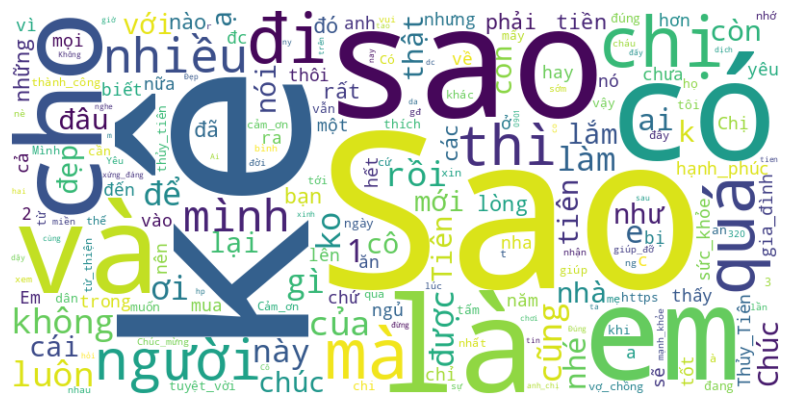

In [30]:

import matplotlib.pyplot as plt
# Hiển thị WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Vẽ biểu đồ

In [31]:
from pyspark.sql.functions import desc
sorted_word_count_df_1 = counts_df.orderBy(desc('count'))
top_20_words_df_1 = sorted_word_count_df_1.limit(20)
top_20_words_pd_1 = top_20_words_df_1.toPandas()

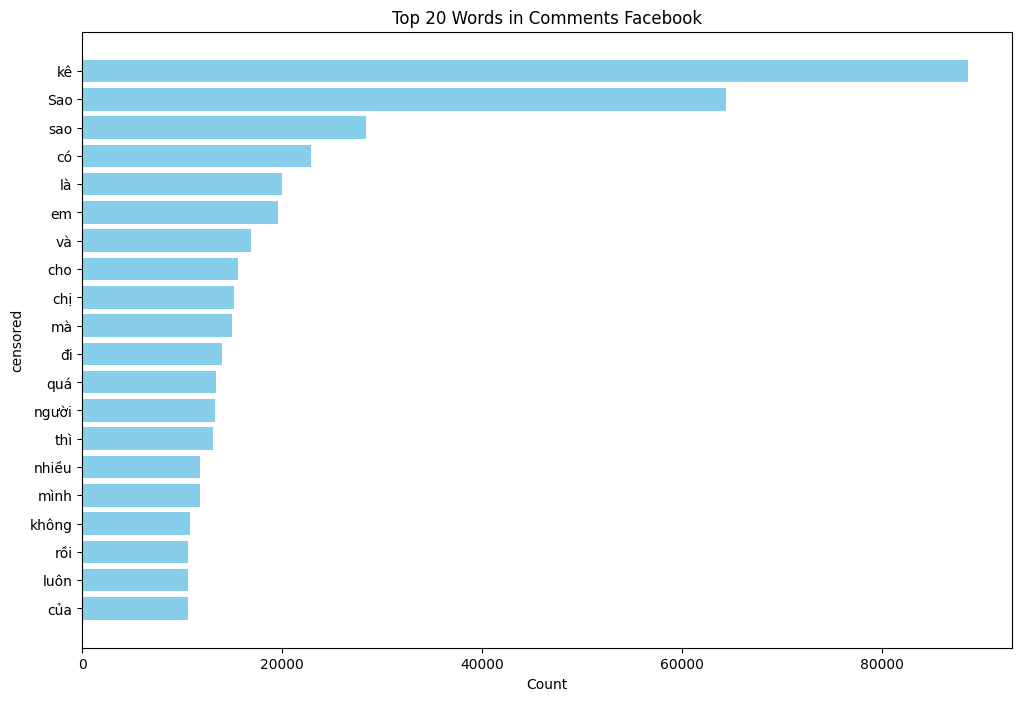

In [32]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ thanh ngang (Bar Chart)
plt.figure(figsize=(12, 8))
plt.barh(top_20_words_pd_1['word'], top_20_words_pd_1['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('censored')
plt.title('Top 20 Words in Comments Facebook')
plt.gca().invert_yaxis()  # Đảo ngược trục y để từ có tần suất cao nhất ở trên cùng
plt.show()

### Tệp comment đã xử lý Chuyển về Dataframe Pyspark

In [33]:
# Chuyển đổi textRDD trở lại thành DataFrame
# Chia các chuỗi văn bản thành các cột
rdd_split = textRDD2.map(lambda line: line.split(","))

# Xác định lược đồ cho DataFrame mới (nếu cần)
columns = csv_data.columns

# Tạo DataFrame từ rdd_split với lược đồ
new_df = rdd_split.toDF(columns)

In [ ]:
# Hiển thị một vài dòng của DataFrame mới để kiểm tra
new_df.show(5)

+--------------------+
|            comments|
+--------------------+
|Thương chị Em tin...|
|  Chuẩn rồi a tin em|
|End of season sal...|
|Kiện bằng mọi giá...|
|úi có anh phóng_v...|
+--------------------+
only showing top 5 rows



In [ ]:
new_df.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|comments                                                                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Thương chị Em tin chị Cảm_ơn chị Chúc vợ_chồng anh_chị thật nhiều sức_khỏe Những người phá_hoại họ sẽ bị trừng_phạt thôi Trả lại bình_yên cho xã_hội                     |
|Chuẩn rồi a tin em                                                                                                                                                       |
|End of season sale giảm 70 anh_em ơi                                                                                                       

#**Phát hiện bình luận tiêu cực**

## Phát hiện cách 1 (Không chạy code này)

In [ ]:
# Bước 1: Tạo SparkSession
#spark = SparkSession.builder.appName("DetectNegativeComments").getOrCreate()

# Bước 2: Đọc dữ liệu bình luận từ file CSV
#comments_df = spark.read.csv("/content/200k_comments.csv", header=True, encoding="UTF-8")

# Bước 3: Đọc danh sách từ ngữ tiêu cực từ file TXT
#with open("/content/toxicword.txt", "r", encoding="utf-8") as f:
#    negative_words = f.read().splitlines()

# Chuyển đổi danh sách từ ngữ tiêu cực thành regex pattern
#negative_pattern = '|'.join([re.escape(word) for word in negative_words])

# Bước 4: Tạo hàm UDF để kiểm tra từ ngữ tiêu cực trong bình luận
#def get_negative_word(comment):
 #   if comment is None:
  #      return None
   # match = re.search(negative_pattern, comment, re.IGNORECASE)
    #if match:
     #   return match.group(0)
    #return None

# Đăng ký UDF
#get_negative_word_udf = udf(get_negative_word, StringType())

# Áp dụng UDF để tạo cột đánh dấu bình luận tiêu cực
#comments_df = comments_df.withColumn("negative_word", get_negative_word_udf(col("comments")))

# Bước 5: Báo cáo và xóa bình luận tiêu cực
# Báo cáo
#negative_comments_df = comments_df.filter(col("negative_word").isNotNull()).select("comments", "negative_word")
#negative_comments_df.show(truncate=False)

# Xóa bình luận tiêu cực
#filtered_comments_df = comments_df.filter(col("negative_word").isNull())

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|comments                                                                                                                                                                                                |negative_word|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|Giúp vật vật trả ơn giúp người người trả oán.nguoi tin thì rất thông cảm còn người k tin giải thích thế nào người ta cũng k tin.chang cần giải thích làm gì cho mệt em ơi                               |ngu          |
|Tụi mày tỉnh táo đi. Nếu là họ bị đào mồ cuốc mà cả 2-3 tháng nay. Họ tức _ tức run người chứ sao. Ai mà k tức                     

In [ ]:
#negative_comments_df.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|comments                                                                                                                                                                                                |negative_word|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|Giúp vật vật trả ơn giúp người người trả oán.nguoi tin thì rất thông cảm còn người k tin giải thích thế nào người ta cũng k tin.chang cần giải thích làm gì cho mệt em ơi                               |ngu          |
|Tụi mày tỉnh táo đi. Nếu là họ bị đào mồ cuốc mà cả 2-3 tháng nay. Họ tức _ tức run người chứ sao. Ai mà k tức                     

In [ ]:
# Hiển thị các bình luận không tiêu cực còn lại
#filtered_comments_df.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------------+
|comments                                                                                                                                                   

## Phát hiện cách 2 (Chạy code này)

In [34]:
# Bước 1: Tạo SparkSession
#spark3 = SparkSession.builder.appName("DetectNegativeComments").getOrCreate()

# Bước 2: Đọc dữ liệu bình luận từ file CSV
#comments_df = spark.read.csv("/content/200k_comments.csv", header=True, encoding="UTF-8")
# Bước 3: Đọc danh sách từ ngữ tiêu cực từ file TXT
with open("/content/toxicword.txt", "r", encoding="utf-8") as f:
    negative_words = f.read().splitlines()

In [ ]:
negative_words

['# Buồi, and its variants',
 'buồi',
 'buoi',
 'dau buoi',
 'daubuoi',
 'caidaubuoi',
 'nhucaidaubuoi',
 'dau boi',
 'bòi',
 'dauboi',
 'caidauboi',
 'đầu bòy',
 'đầu bùi',
 'dau boy',
 'dauboy',
 'caidauboy',
 'b`',
 '###############################',
 '# Cặc, and its variants',
 'cặc',
 'cak',
 'kak',
 'kac',
 'cac',
 'concak',
 'nungcak',
 'bucak',
 'caiconcac',
 'caiconcak',
 'cu',
 'cặk',
 'cak',
 'dái',
 'giái',
 'zái',
 'kiu',
 '###############################',
 '# Cứt, and its variants',
 'cứt',
 'cuccut',
 'cutcut',
 'cứk',
 'cuk',
 'cười ỉa',
 'cười ẻ',
 '###############################',
 '# Đéo and its variants',
 'đéo',
 'đếch',
 'đếk',
 'dek',
 'đết',
 'đệt',
 'đách',
 'dech',
 "đ'",
 'deo',
 "d'",
 'đel',
 'đél',
 'del',
 'dell ngửi',
 'dell ngui',
 'dell chịu',
 'dell chiu',
 'dell hiểu',
 'dell hieu',
 'dellhieukieugi',
 'dell nói',
 'dell noi',
 'dellnoinhieu',
 'dell biết',
 'dell biet',
 'dell nghe',
 'dell ăn',
 'dell an',
 'dell được',
 'dell duoc',
 'dell làm',

In [ ]:
# Sau khi đã tiền xử lý file "/content/200k_comments.csv"
    #csv_data thể hiện cho "/content/200k_comments.csv"
    #Tiền xử lý file csv_data xong được đặt tên mới là new_df (đây là DataFrame Pyspark)


In [35]:
# Chuyển đổi danh sách từ ngữ tiêu cực thành regex pattern với ranh giới từ
negative_pattern1 = r'\b(' + '|'.join([re.escape(word) for word in negative_words]) + r')\b'

# Bước 4: Tạo hàm UDF để kiểm tra từ ngữ tiêu cực trong bình luận
def get_negative_word_1(comment):
    if comment is None:
        return None
    match = re.search(negative_pattern1, comment, re.IGNORECASE)
    if match:
        return match.group(0)
    return None

# Đăng ký UDF
get_negative_word_udf_1 = udf(get_negative_word_1, StringType())

# Áp dụng UDF để tạo cột đánh dấu bình luận tiêu cực
comments_df_1 = new_df.withColumn("negative_word", get_negative_word_udf_1(col("comments")))

In [ ]:
comments_df_1.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|comments                                                                                                                                                                 |negative_word|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|Thương chị Em tin chị Cảm_ơn chị Chúc vợ_chồng anh_chị thật nhiều sức_khỏe Những người phá_hoại họ sẽ bị trừng_phạt thôi Trả lại bình_yên cho xã_hội                     |NULL         |
|Chuẩn rồi a tin em                                                                                                                                                       |NULL         |
|End of season sale giảm 70 anh_em ơi                                 

In [36]:
# Bước 5: Báo cáo và xóa bình luận tiêu cực
# Báo cáo các bình luận tiêu cực
negative_comments_df_1 = comments_df_1.filter(col("negative_word").isNotNull()).select("comments", "negative_word")

In [ ]:
negative_comments_df_1.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|comments                                                                                                                                                                                                 |negative_word|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|Người_ta đã khổ_sở đi làm từ_thiện Những người đóng_góp họ ko kêu gì mấy người ko đóng_góp thì soi_mói bới_móc hãm                                                                                       |hãm          |
|Nói_chuyện thì phải vấp chứ tao nói với ba mẹ tao tao còn vấp huống_chi đứng trước nhiều người báo_chí ở đó mà kịch_bản mệt vl 

In [37]:
# Xóa các bình luận tiêu cực
filtered_comments_df_1 = comments_df_1.filter(col("negative_word").isNull())

In [ ]:
# Hiển thị các bình luận không tiêu cực còn lại
filtered_comments_df_1.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|comments                                                                                                                                                                 |negative_word|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|Thương chị Em tin chị Cảm_ơn chị Chúc vợ_chồng anh_chị thật nhiều sức_khỏe Những người phá_hoại họ sẽ bị trừng_phạt thôi Trả lại bình_yên cho xã_hội                     |NULL         |
|Chuẩn rồi a tin em                                                                                                                                                       |NULL         |
|End of season sale giảm 70 anh_em ơi                                 

#**Không cho phép đăng bình luận tiêu cực**

In [ ]:
# Vòng lặp yêu cầu người dùng nhập bình luận
while True:
    user_comment = input("Nhập bình luận của bạn (hoặc nhập 'exit' để thoát): ")

    if user_comment.lower() == 'exit':
        break

    negative_word = get_negative_word_1(user_comment)

    if negative_word is None:
        print("Bình luận đã được đăng nhập thành công")
    else:
        print("Bình luận của bạn chứa nội dung tiêu cực và đã bị xóa.")

Nhập bình luận của bạn (hoặc nhập 'exit' để thoát): Hôm này làm có vui không
Bình luận đã được đăng nhập thành công
Nhập bình luận của bạn (hoặc nhập 'exit' để thoát): Đm hôm nay là một ngày tồi tệ
Phát hiện bình luận có chưa từ ngữ tiêu cực
Nhập bình luận của bạn (hoặc nhập 'exit' để thoát): exit


# **TRỰC QUAN HÓA**

## Đếm từ ngữ tiêu cực hướng [Không phân biệt chữ hoa chữ thường]

In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, lower
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#Nếu đã dừng Spark thì hãy khỏi động lại bằng câu lệnh bên dưới:

#spark = SparkSession.builder \
#    .appName("ReadCSVExample") \
#    .getOrCreate()

In [39]:
# Chuẩn hóa dữ liệu: Chuyển tất cả các từ trong cột 'negative_word' về chữ viết thường
negative_comments_df_3 = negative_comments_df_1.withColumn('negative_word', lower(negative_comments_df_1['negative_word']))

In [40]:
# Tách các từ trong cột 'negative_word' và đếm tần suất
words_df_1 = negative_comments_df_3.select(explode(split('negative_word', ' ')).alias('word'))

In [41]:
# Đếm tần suất xuất hiện của từng từ
word_count_df_1 = words_df_1.groupBy('word').count()
word_count_df_1 = word_count_df_1.orderBy('count', ascending=False)

In [ ]:
word_count_df_1.show()

+-----+-----+
| word|count|
+-----+-----+
|  đéo| 1054|
|  ngu|  581|
|   cu|  281|
|   vl|  260|
|   đm|  235|
|   mẹ|  188|
|  vãi|  152|
|   cl|  149|
|   dm|  129|
|  cac|  128|
|   kệ|  105|
|  vcl|  101|
|  deo|   80|
|  hãm|   73|
|  lol|   70|
| chết|   69|
|chịch|   65|
|   đĩ|   64|
|  cmn|   63|
|  sml|   51|
+-----+-----+
only showing top 20 rows



In [42]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace

# Khởi tạo SparkSession
spark1 = SparkSession.builder.appName("WordCensorship").getOrCreate()

# Dữ liệu mẫu
data = word_count_df_1

# Hàm để làm mờ từ
# Hàm để làm mờ từ
def censor_word(word):
    if len(word) == 2:
        return word[0] + "*"
    elif len(word) >= 3:
        return word[0] + "*" * (len(word) - 2) + word[-1]
    else:
        return word

# UDF để áp dụng hàm censor_word
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

censor_word_udf = udf(censor_word, StringType())

# Áp dụng hàm làm mờ từ vào cột "word"
censored_df = word_count_df_1.withColumn("censored_word", censor_word_udf(col("word")))

In [ ]:
# Hiển thị kết quả
censored_df.show()

+-----+-----+-------------+
| word|count|censored_word|
+-----+-----+-------------+
|  đéo| 1054|          đ*o|
|  ngu|  581|          n*u|
|   cu|  281|           c*|
|   vl|  260|           v*|
|   đm|  235|           đ*|
|   mẹ|  188|           m*|
|  vãi|  152|          v*i|
|   cl|  149|           c*|
|   dm|  129|           d*|
|  cac|  128|          c*c|
|   kệ|  105|           k*|
|  vcl|  101|          v*l|
|  deo|   80|          d*o|
|  hãm|   73|          h*m|
|  lol|   70|          l*l|
| chết|   69|         c**t|
|chịch|   65|        c***h|
|   đĩ|   64|           đ*|
|  cmn|   63|          c*n|
|  sml|   51|          s*l|
+-----+-----+-------------+
only showing top 20 rows



In [43]:
# Lấy hai cột "censored_word" và "count"
result_df = censored_df.select(col("censored_word").alias("censored"), col("count"))

In [ ]:
# Hiển thị kết quả
result_df.show(truncate=False)

+--------+-----+
|censored|count|
+--------+-----+
|đ*o     |1054 |
|n*u     |581  |
|c*      |281  |
|v*      |260  |
|đ*      |235  |
|m*      |188  |
|v*i     |152  |
|c*      |149  |
|d*      |129  |
|c*c     |128  |
|k*      |105  |
|v*l     |101  |
|d*o     |80   |
|h*m     |73   |
|l*l     |70   |
|c**t    |69   |
|c***h   |65   |
|đ*      |64   |
|c*n     |63   |
|s*l     |51   |
+--------+-----+
only showing top 20 rows



In [44]:
# Chuyển đổi DataFrame từ PySpark sang Pandas
pandas_df = result_df.toPandas()

In [45]:
# Chuyển đổi kết quả về Pandas DataFrame
word_count_pd = word_count_df_1.toPandas()

In [46]:
# Tạo từ điển tần suất từ
word_freq1 = dict(zip(pandas_df ['censored'], pandas_df ['count']))

In [47]:
# Tạo WordCloud
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq1)


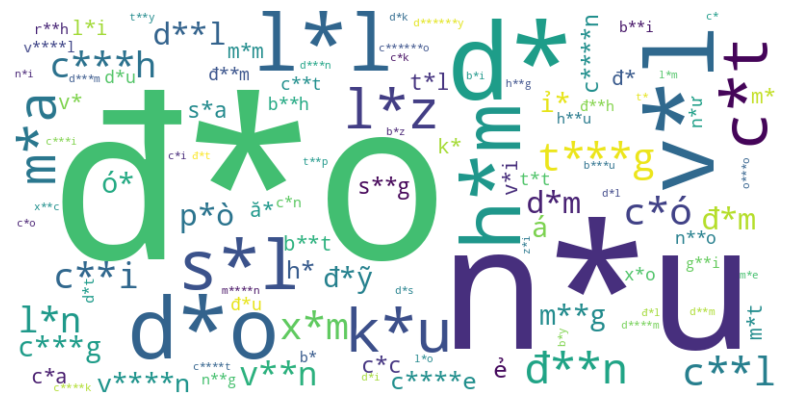

In [48]:
# Hiển thị WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

## Biểu đồ trực quan hóa

### Sắp xếp theo top 20 từ

In [49]:
from pyspark.sql.functions import desc

In [50]:
# Sắp xếp DataFrame theo cột 'count' theo thứ tự giảm dần
sorted_word_count_df = result_df.orderBy(desc('count'))

# Lấy top 20 từ
top_20_words_df = sorted_word_count_df.limit(20)


In [ ]:
# Hiển thị kết quả
top_20_words_df.show()

+--------+-----+
|censored|count|
+--------+-----+
|     đ*o| 1054|
|     n*u|  581|
|      c*|  281|
|      v*|  260|
|      đ*|  235|
|      m*|  188|
|     v*i|  152|
|      c*|  149|
|      d*|  129|
|     c*c|  128|
|      k*|  105|
|     v*l|  101|
|     d*o|   80|
|     h*m|   73|
|     l*l|   70|
|    c**t|   69|
|   c***h|   65|
|      đ*|   64|
|     c*n|   63|
|     s*l|   51|
+--------+-----+



In [ ]:
sorted_word_count_df.show()

+--------+-----+
|censored|count|
+--------+-----+
|     đ*o| 1054|
|     n*u|  581|
|      c*|  281|
|      v*|  260|
|      đ*|  235|
|      m*|  188|
|     v*i|  152|
|      c*|  149|
|      d*|  129|
|     c*c|  128|
|      k*|  105|
|     v*l|  101|
|     d*o|   80|
|     h*m|   73|
|     l*l|   70|
|    c**t|   69|
|   c***h|   65|
|      đ*|   64|
|     c*n|   63|
|     s*l|   51|
+--------+-----+
only showing top 20 rows



Nếu dùng dataframe từ thư viện Pandas

In [51]:
import pandas as pd

In [52]:
top_20_words_pd = top_20_words_df.toPandas()

In [ ]:
print(top_20_words_pd)

   censored  count
0       đ*o   1054
1       n*u    581
2        c*    281
3        v*    260
4        đ*    235
5        m*    188
6       v*i    152
7        c*    149
8        d*    129
9       c*c    128
10       k*    105
11      v*l    101
12      d*o     80
13      h*m     73
14      l*l     70
15     c**t     69
16    c***h     65
17       đ*     64
18      c*n     63
19      s*l     51


In [53]:
All_negative_words=sorted_word_count_df.toPandas()

In [54]:
All_negative_words.head()

,censored,count
0,đ*o,1054
1,n*u,581
2,c*,281
3,v*,260
4,đ*,235


### Biểu đồ

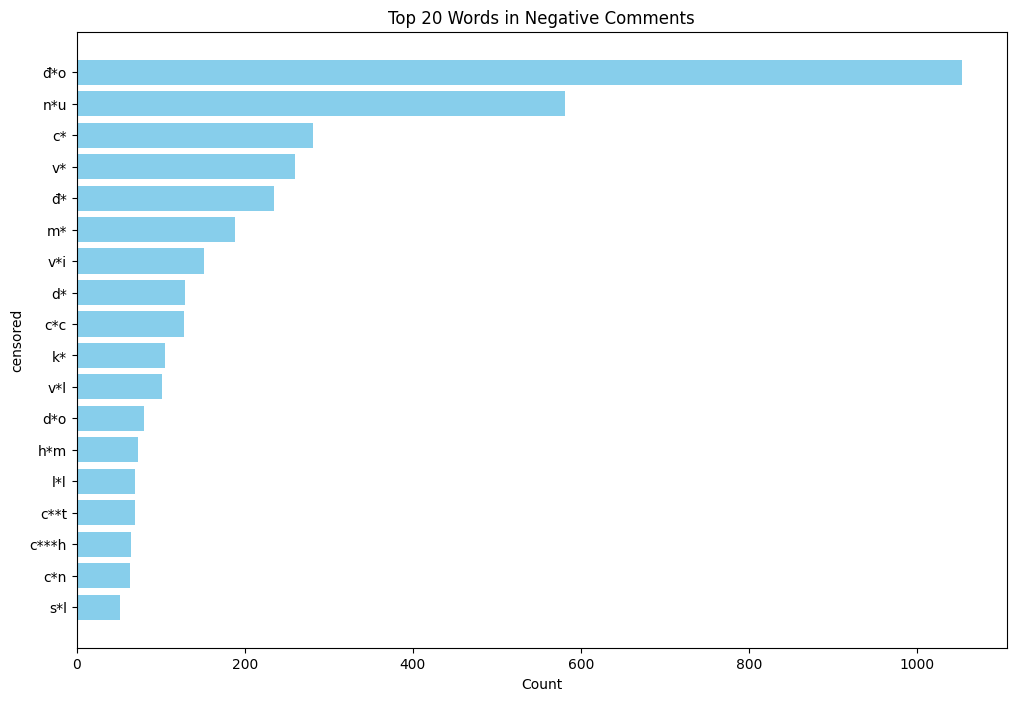

In [55]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ thanh ngang (Bar Chart)
plt.figure(figsize=(12, 8))
plt.barh(top_20_words_pd['censored'], top_20_words_pd['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('censored')
plt.title('Top 20 Words in Negative Comments')
plt.gca().invert_yaxis()  # Đảo ngược trục y để từ có tần suất cao nhất ở trên cùng
plt.show()

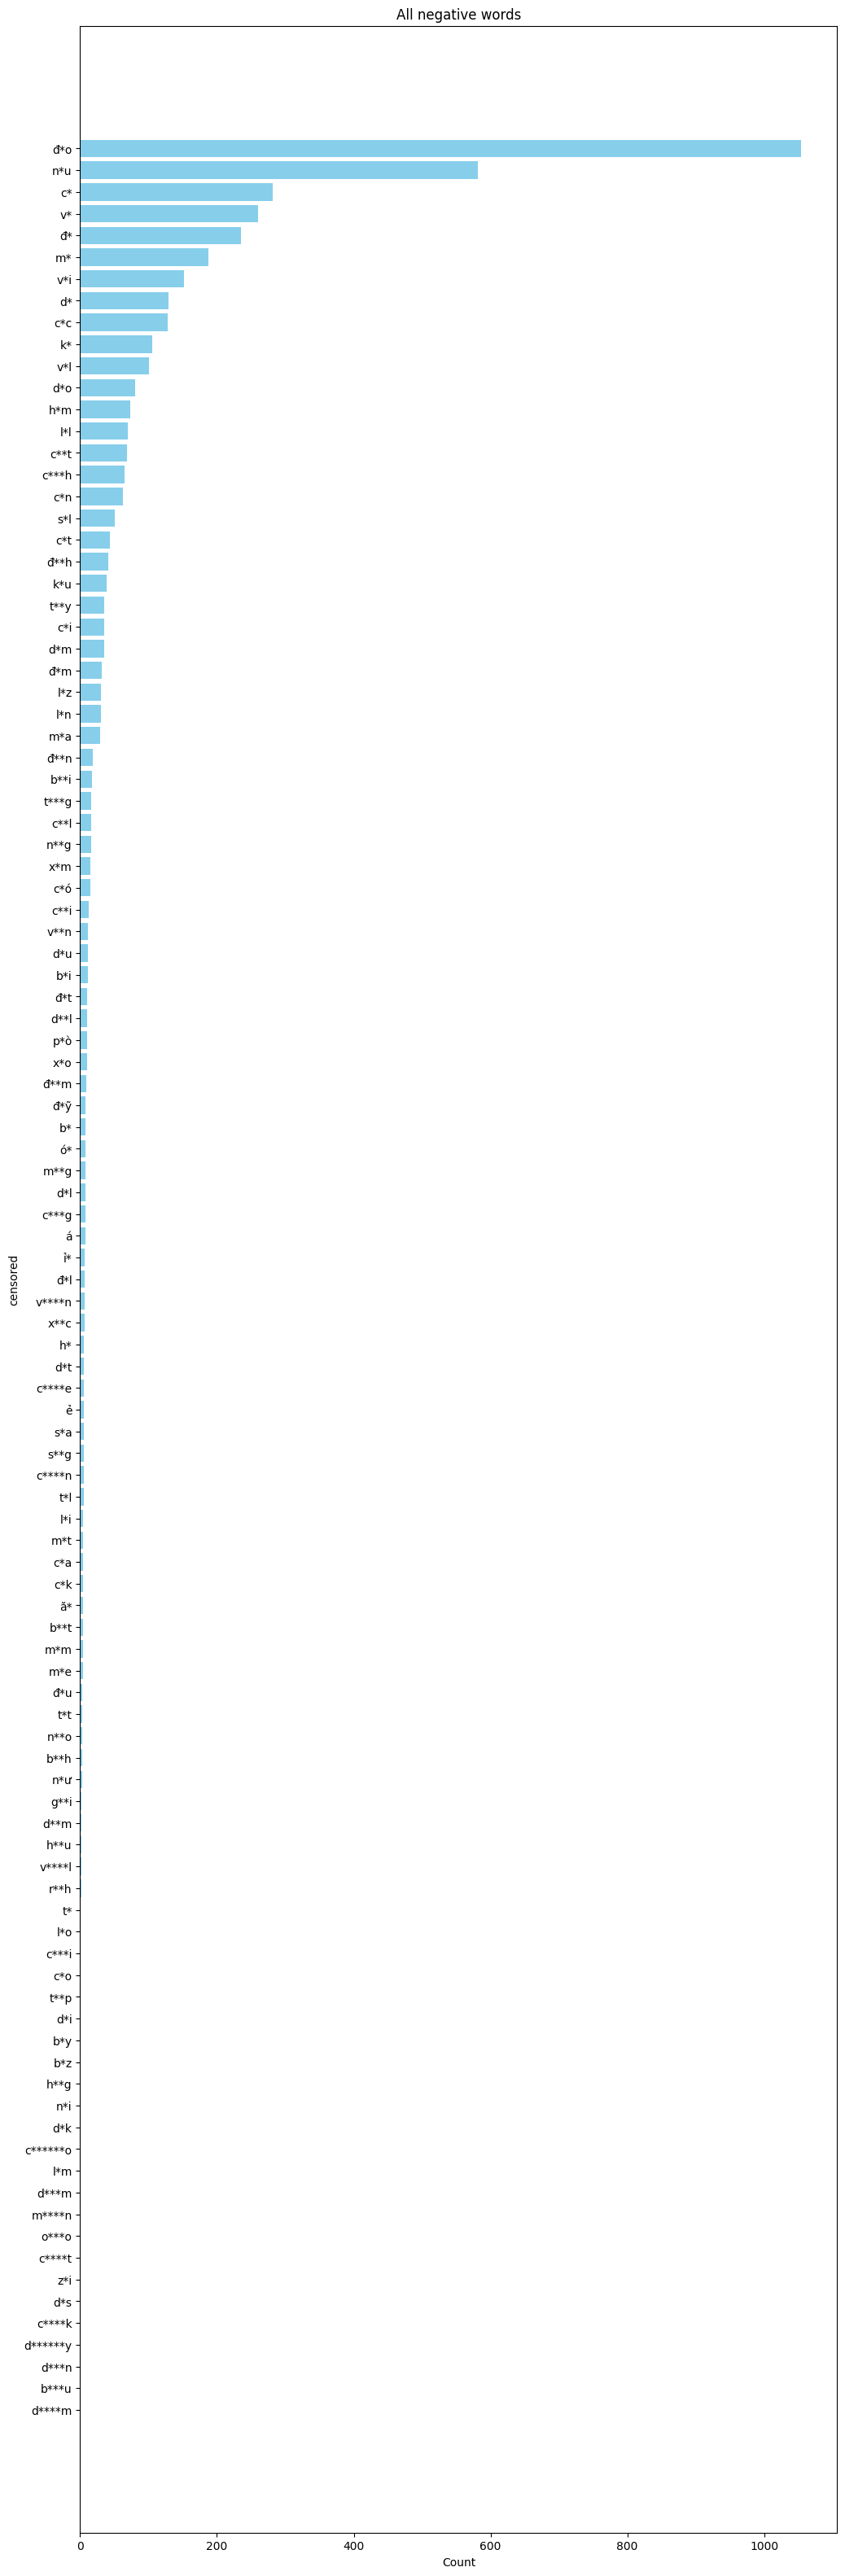

In [58]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ thanh ngang (Bar Chart)
plt.figure(figsize=(12, 40))
plt.barh(All_negative_words['censored'], All_negative_words['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('censored')
plt.title('All negative words')
plt.gca().invert_yaxis()  # Đảo ngược trục y để từ có tần suất cao nhất ở trên cùng
plt.show()

In [ ]:
#Sử dụng dataframe : Pie Chart

import altair as alt
chart = alt.Chart(All_negative_words).mark_arc().encode(
    theta=alt.Theta(field="count", type="quantitative"),
    color=alt.Color(field="censored", type="nominal"),
).properties(
    width=500,
    height=300,
)
chart


alt.Chart(...)

In [ ]:
#Sử dụng dataframe top_20_words_pd: Pie Chart

import altair as alt
chart = alt.Chart(top_20_words_pd).mark_arc().encode(
    theta=alt.Theta(field="count", type="quantitative"),
    color=alt.Color(field="censored", type="nominal"),
).properties(
    width=500,
    height=300,
)
chart


alt.Chart(...)

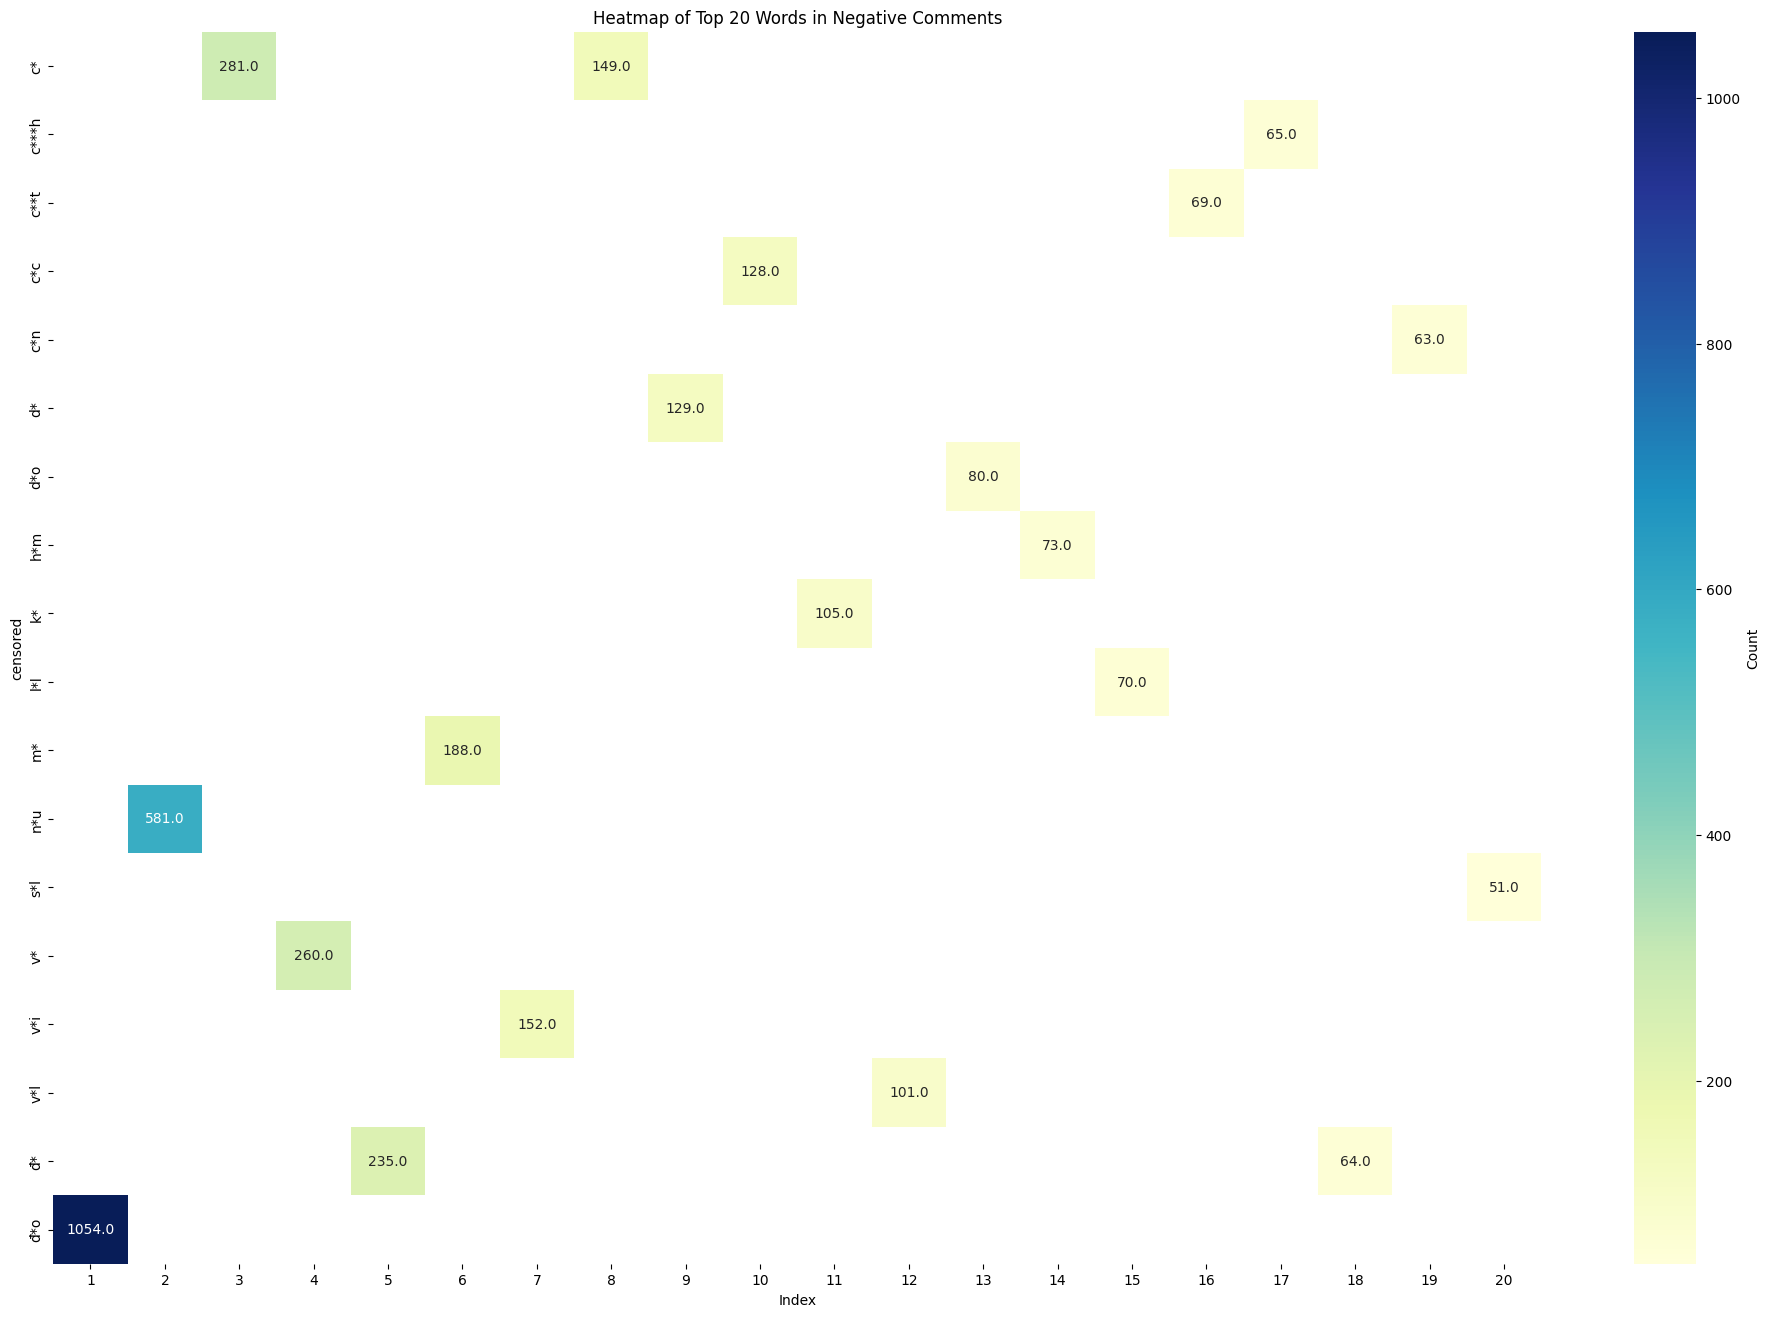

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Tạo một trục x giả để tạo heatmap
top_20_words_pd['index'] = range(1, len(top_20_words_pd) + 1)
# Tạo một Pivot Table để dùng cho heatmap
heatmap_data = pd.pivot_table(top_20_words_pd, values='count', index='censored', columns='index')
# Vẽ heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title('Heatmap of Top 20 Words in Negative Comments')
plt.xlabel('Index')
plt.ylabel('censored')
plt.show()

# **DỪNG SPARK**

In [ ]:
# Dừng SparkSession
spark.stop()

In [ ]:
spark1.stop()